# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- x Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- x Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
- x Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- x Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- x Comment on what you see

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from lfp_functions import power, bandpass_filter, morlet_transform

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


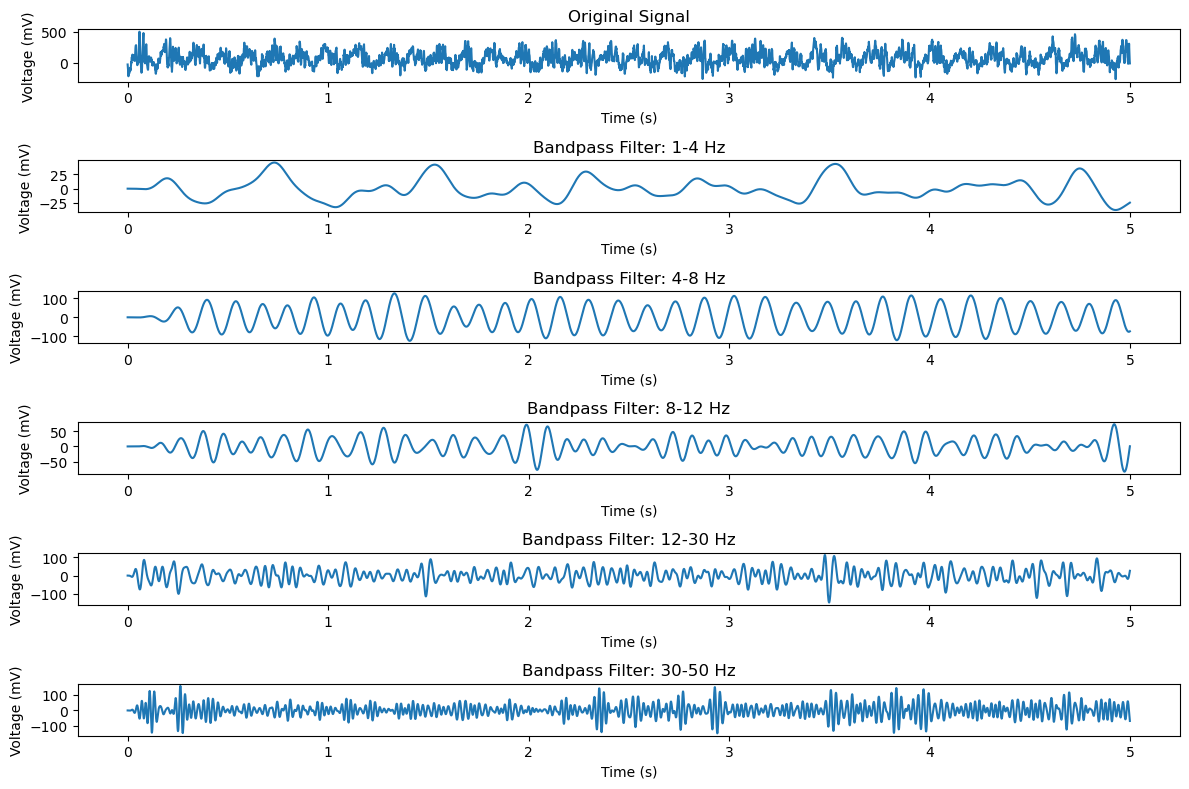

In [37]:
# Load the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

#Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
# Extract a few seconds of data (e.g., 5 seconds)
duration = 5
samples = int(duration * sampling_rate)
lfp_segment = lfp[:samples]

# Define different frequency bands
frequency_bands = [(1, 4), (4, 8), (8, 12), (12, 30), (30, 50)]

# Plot the original signal
plt.figure(figsize=(12, 8))
plt.subplot(len(frequency_bands) + 1, 1, 1)
plt.plot(np.linspace(0, duration, samples), lfp_segment)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

# Apply bandpass filters and plot the resulting signals
for i, (lowcut, highcut) in enumerate(frequency_bands):
    filtered_data = bandpass_filter(lfp_segment, lowcut, highcut, sampling_rate)
    plt.subplot(len(frequency_bands) + 1, 1, i + 2)
    plt.plot(np.linspace(0, duration, samples), filtered_data)
    plt.title(f'Bandpass Filter: {lowcut}-{highcut} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')

plt.tight_layout()
plt.show()

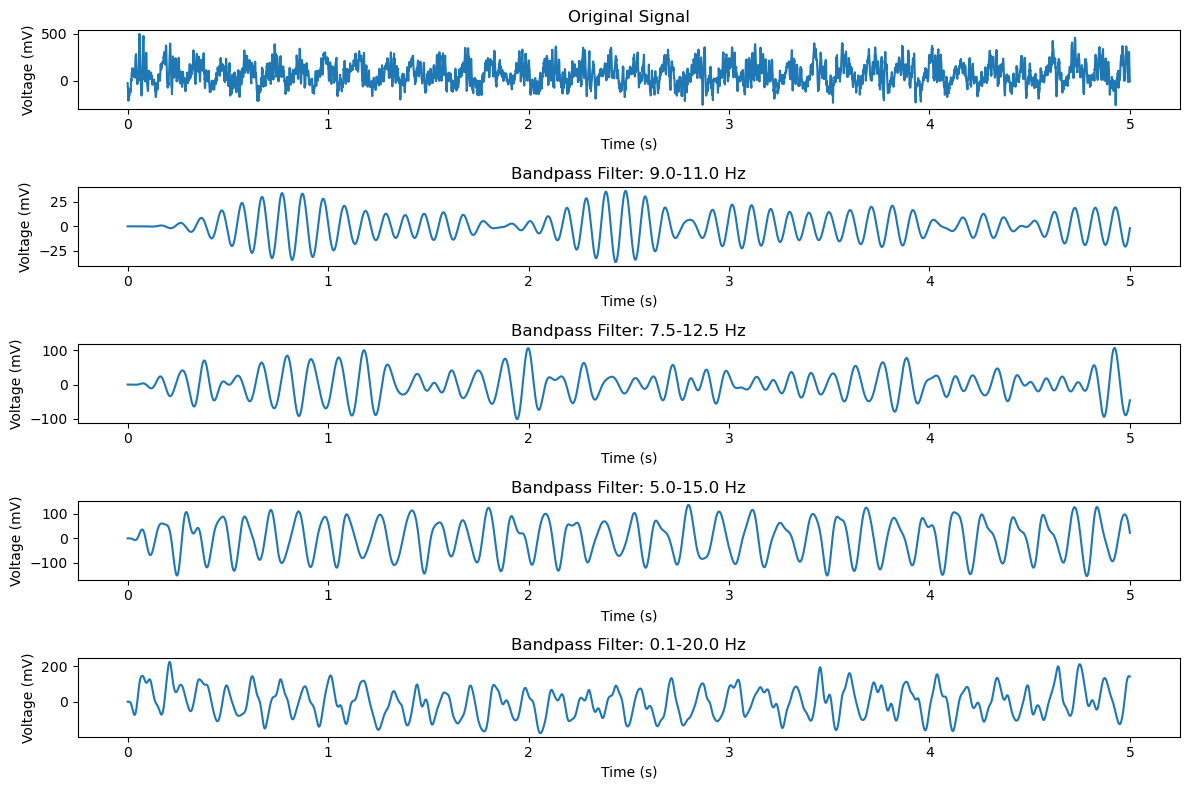

In [33]:
# Fix the central frequency and vary the width of the band
central_freq = 10
band_widths = [2, 5, 10, 20]

plt.figure(figsize=(12, 8))
plt.subplot(len(band_widths) + 1, 1, 1)
plt.plot(np.linspace(0, duration, samples), lfp_segment)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

for i, bw in enumerate(band_widths):
    lowcut = max(0.1, central_freq - bw / 2)  # Ensure lowcut is > 0
    highcut = min(sampling_rate / 2, central_freq + bw / 2)  # Ensure highcut < Nyquist frequency
    filtered_data = bandpass_filter(lfp_segment, lowcut, highcut, sampling_rate)
    plt.subplot(len(band_widths) + 1, 1, i + 2)
    plt.plot(np.linspace(0, duration, samples), filtered_data)
    plt.title(f'Bandpass Filter: {lowcut}-{highcut} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')

plt.tight_layout()
plt.show()

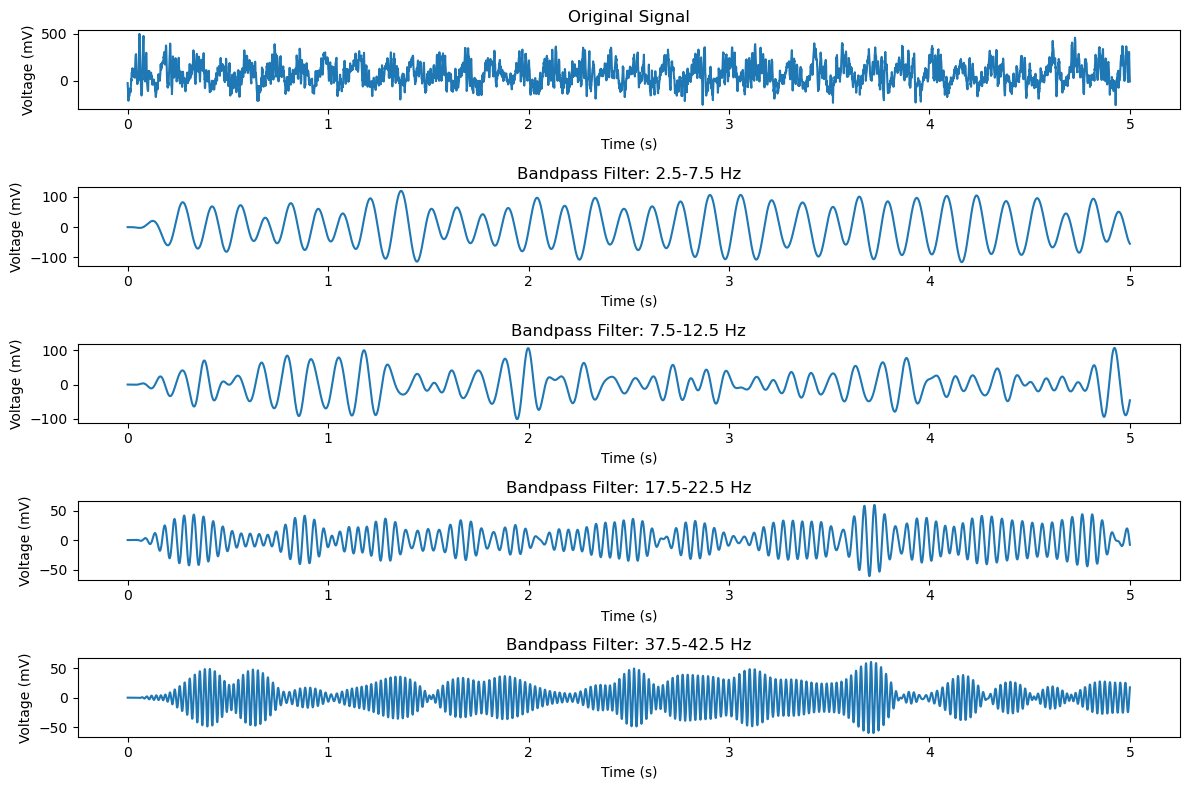

In [34]:
# Change the central frequency of the band while keeping the band width constant
band_width = 5
central_freqs = [5, 10, 20, 40]

plt.figure(figsize=(12, 8))
plt.subplot(len(central_freqs) + 1, 1, 1)
plt.plot(np.linspace(0, duration, samples), lfp_segment)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

for i, cf in enumerate(central_freqs):
    lowcut = max(0.1, cf - band_width / 2)  # Ensure lowcut is > 0
    highcut = min(sampling_rate / 2, cf + band_width / 2)  # Ensure highcut < Nyquist frequency
    filtered_data = bandpass_filter(lfp_segment, lowcut, highcut, sampling_rate)
    plt.subplot(len(central_freqs) + 1, 1, i + 2)
    plt.plot(np.linspace(0, duration, samples), filtered_data)
    plt.title(f'Bandpass Filter: {lowcut}-{highcut} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')

plt.tight_layout()
plt.show()

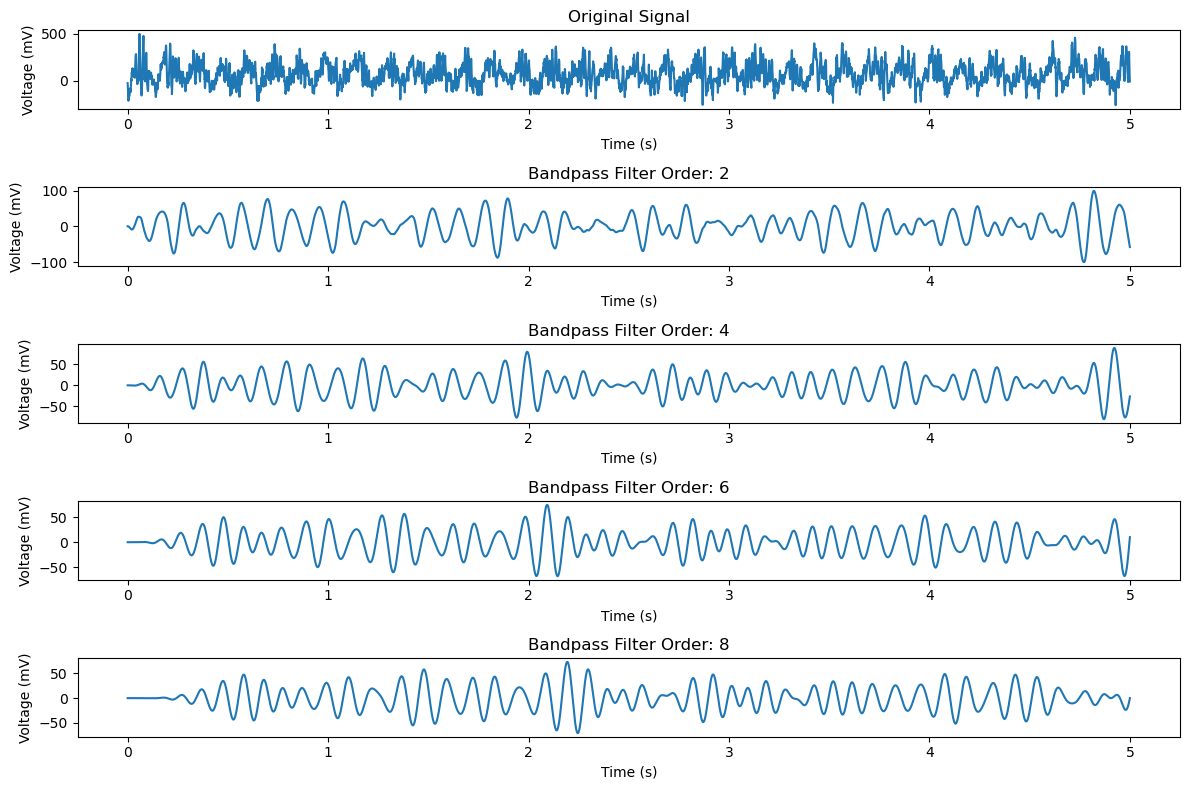

Computing times for different filter orders:
Order 2:
208 μs ± 2.75 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Order 4:
280 μs ± 4.17 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Order 6:
352 μs ± 565 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Order 8:
441 μs ± 3.74 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [36]:
#Change the order of the filter, keeping the frequency band fixed.
# Define a fixed frequency band
lowcut = 8
highcut = 12
filter_orders = [2, 4, 6, 8]

plt.figure(figsize=(12, 8))
plt.subplot(len(filter_orders) + 1, 1, 1)
plt.plot(np.linspace(0, duration, samples), lfp_segment)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

# Apply bandpass filters with different orders and plot the resulting signals
for i, order in enumerate(filter_orders):
    filtered_data = bandpass_filter(lfp_segment, lowcut, highcut, sampling_rate, filter_order=order)
    plt.subplot(len(filter_orders) + 1, 1, i + 2)
    plt.plot(np.linspace(0, duration, samples), filtered_data)
    plt.title(f'Bandpass Filter Order: {order}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')

plt.tight_layout()
plt.show()

# Measure the computing time for different filter orders using %timeit
print("Computing times for different filter orders:")
for order in filter_orders:
    print(f"Order {order}:")
    %timeit -o bandpass_filter(lfp_segment, lowcut, highcut, sampling_rate, filter_order=order)

**How does the filtered signal change?**
- As the filter order increases, the filtered signal becomes smoother and more regular.
- Higher-order filters attenuate high-frequency noise more effectively, resulting in a cleaner signal.
- However, higher-order filters can introduce more phase shifts and delay in the signal.

**How does the computing time change?**
- The computing time increases with the filter order.
- Lower-order filters are faster but less effective at noise reduction.
- Higher-order filters are more computationally intensive but provide better noise attenuation and a cleaner signal.

**Comment what you see (one point per subquestion, not sure if this referred to the last bit or to everything i did so far).** 
- Different frequency bands highlight specific neural oscillations (delta, theta, alpha, beta, gamma).
- Changing the band width around a central frequency affects the signal's complexity and the range of captured oscillations.
- Varying the central frequency with a fixed band width shifts the focus to different neural oscillatory activities, emphasizing distinct frequency bands and their corresponding signal characteristics.
- higher-order filters provide better frequency selectivity at the cost of increased computational complexity and potential phase distortion.




## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
import pywt
import scipy.signal as signal
from scipy.signal import spectrogram

sys.path.append(os.path.abspath("code"))
from lfp_functions import power, bandpass_filter, morlet_transform

# Load the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

# Extract a few seconds of data (e.g., 5 seconds)
duration = 5
samples = int(duration * sampling_rate)
lfp_segment = lfp[:samples]


Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


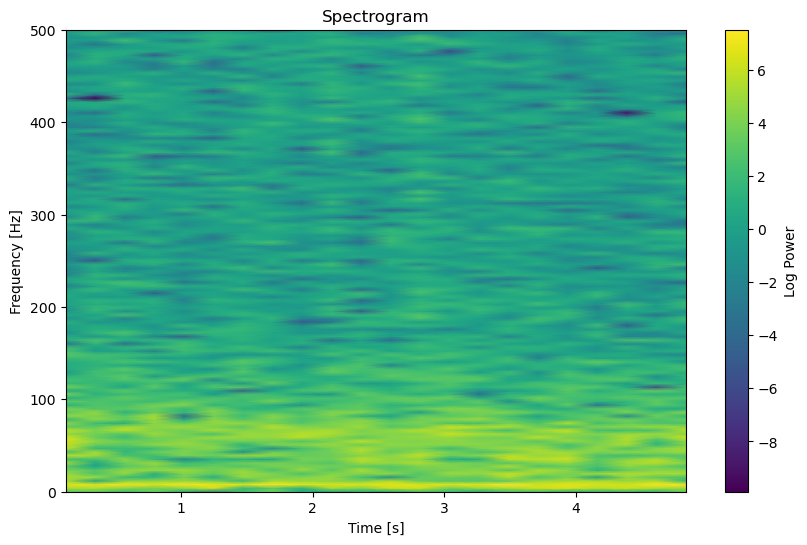

In [41]:
# Compute the spectrogram
f, t, Sxx = spectrogram(lfp_segment, fs=sampling_rate, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.log(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Log Power')
plt.show()


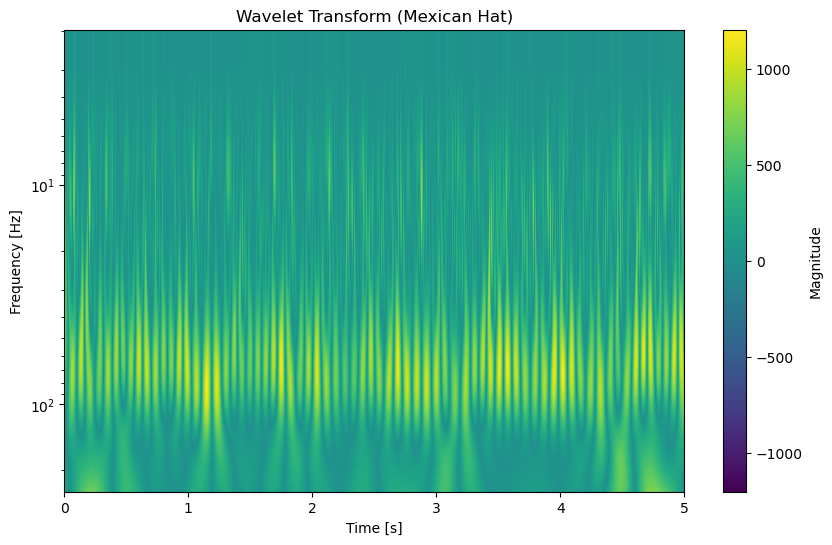

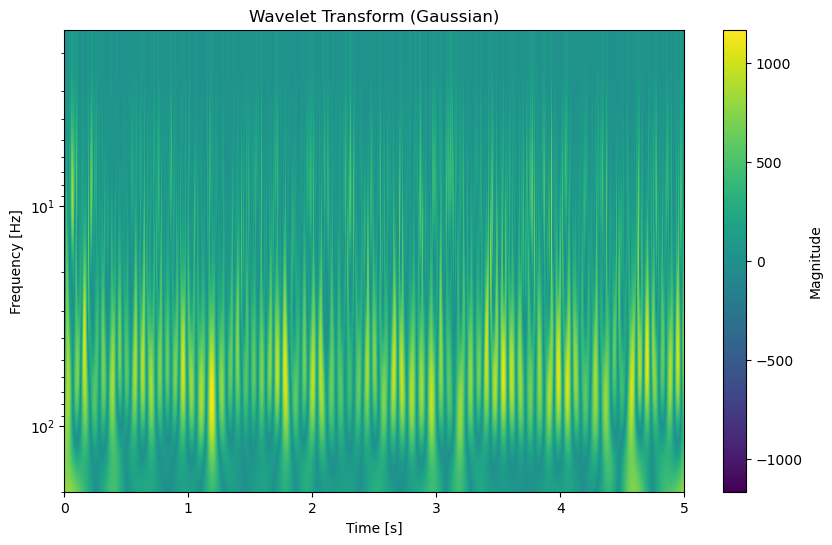

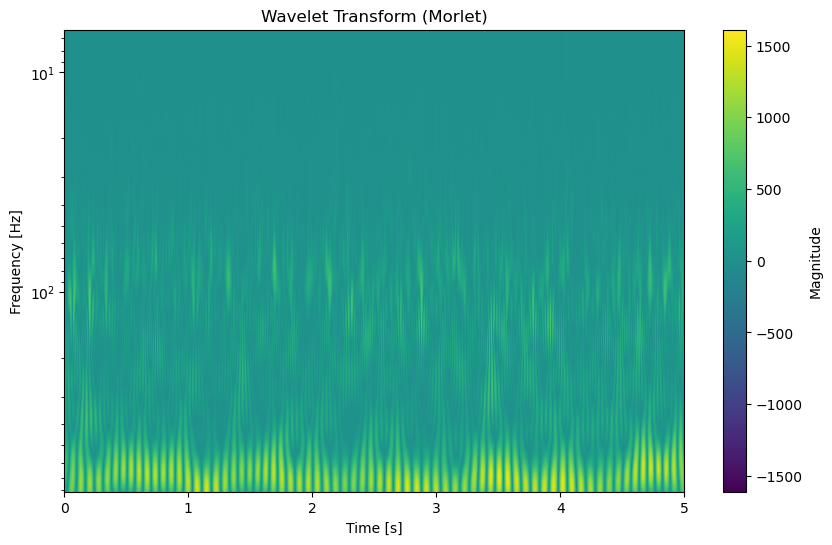

In [42]:
def plot_wavelet_transform(signal, sampling_rate, wavelet_name, title):
    scales = np.arange(1, 128)
    coef, freqs = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sampling_rate)
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coef), extent=[0, duration, freqs[0], freqs[-1]], interpolation='bilinear', aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
    plt.yscale('log')
    plt.colorbar(label='Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title(f'Wavelet Transform ({title})')
    plt.show()

# Mexican Hat wavelet
plot_wavelet_transform(lfp_segment, sampling_rate, 'mexh', 'Mexican Hat')

# Gaussian wavelet
plot_wavelet_transform(lfp_segment, sampling_rate, 'gaus1', 'Gaussian')

# Morlet wavelet
plot_wavelet_transform(lfp_segment, sampling_rate, 'morl', 'Morlet')


- The complex Morlet transform provides the most detailed and well-separated frequency bands, showing distinct oscillatory patterns.
- The Gaussian wavelet and Mexican hat capture changes and edges with good time localization but has broader and less distinct frequency bands. Both lack the fine frequency resolution seen with the Morlet wavelet.
The Morlet wavelet's superior frequency resolution and distinct time-frequency representation make it more effective for detailed spectral analysis.


Why?
- Frequency and time: Morlet Wavelet combines a Gaussian window with a sinusoidal wave, providing an excellent balance between time and frequency localization. This allows it to capture fine details and provide clear separation of frequency components. Gaussian and mexican Hat wavelets  prioritize time localization over frequency localization. The Gaussian wavelet is particularly good for detecting abrupt changes, while the Mexican Hat wavelet (second derivative of a Gaussian) is useful for highlighting broad features and oscillations. However, their broader time windows result in less precise frequency resolution.


- Amplitude and phase: Morlet Wavelet are complex-valued, so it can capture both amplitude and phase information, providing a more comprehensive representation of oscillatory components and their temporal dynamics, while the other two are real-valued wavelets capture only amplitude information, missing out on phase details. This limits their ability to resolve fine spectral features and to represent the signal's oscillatory behavior accurately.

- application/design: morlet wavelet is designed for time-frequency analysis, making it ideal for applications that require detailed spectral analysis, such as neural signal processing. The other two, while effective for edge detection and highlighting broad features, are less suited for detailed frequency analysis. Their design focuses more on capturing signal changes and broader oscillatory patterns rather than fine spectral details.

- Wavelet properties: Morlet's continuous nature and the optimal time-frequency trade-off make this wavelet a preferred choice for analyzing complex signals where both temporal and spectral details are crucial.The other wavelets, with their simpler and more localized nature, are beneficial for certain types of signal analysis but inherently lack the detailed frequency resolution of the Morlet wavelet.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


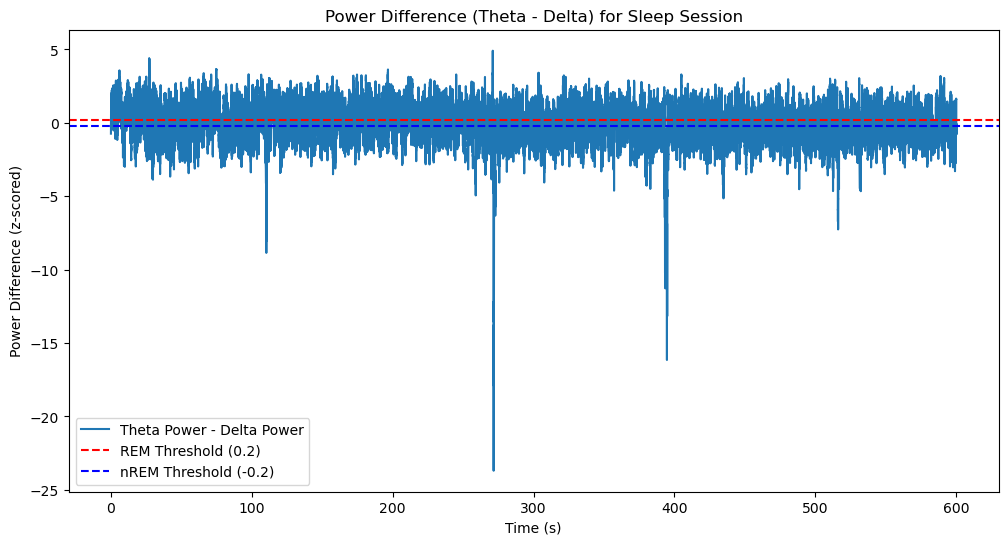

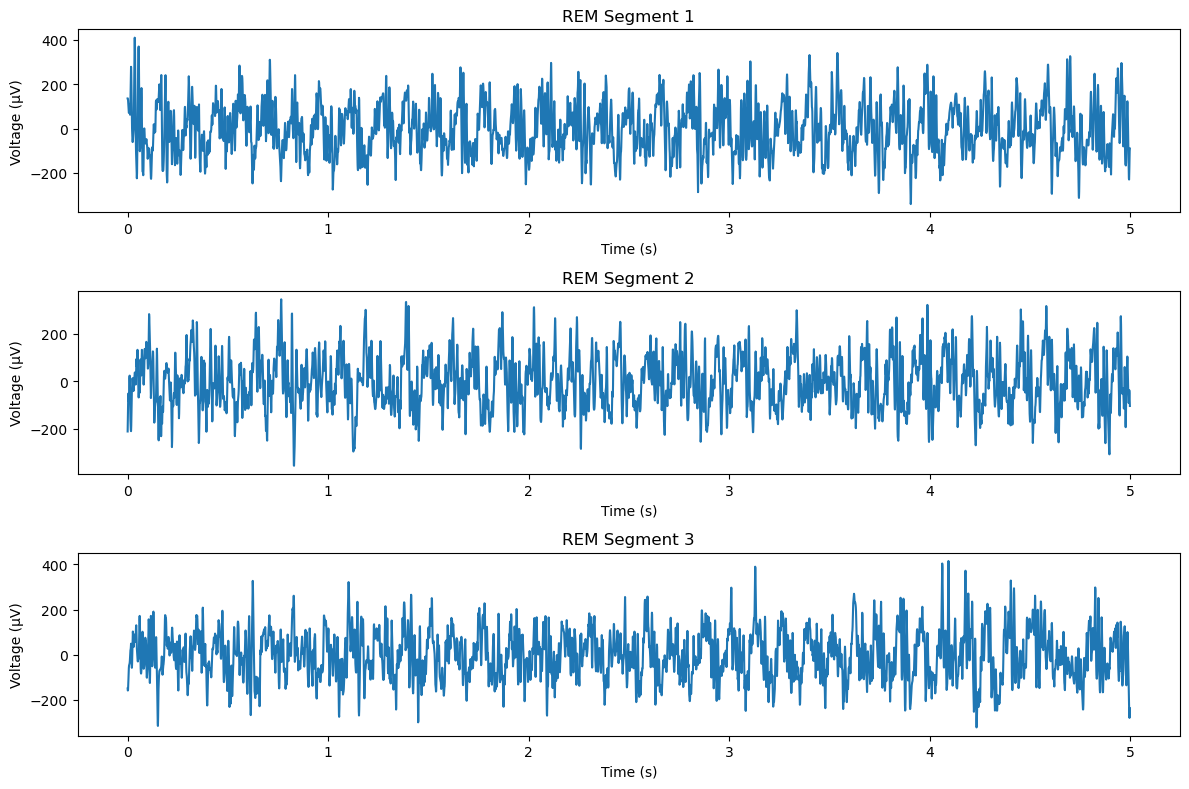

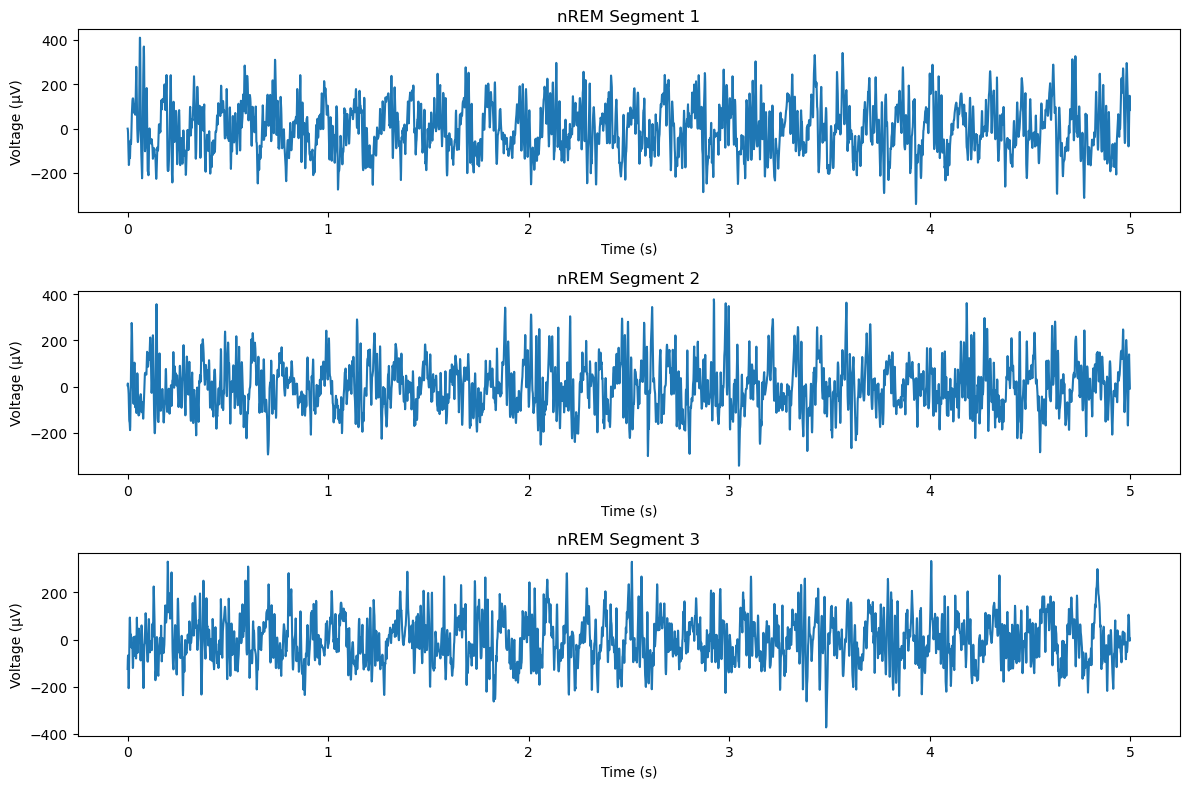

In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys
import os

sys.path.append(os.path.abspath("code"))
from lfp_functions import bandpass_filter, morlet_transform, power

# Load the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

# Compute the power in the theta (6-10 Hz) and delta (2-4 Hz) bands using the Morlet wavelet transform
theta_power = power(lfp, 6, 10, sampling_rate=sampling_rate)
delta_power = power(lfp, 2, 4, sampling_rate=sampling_rate)

# Z-score the power signals
theta_power_z = stats.zscore(theta_power)
delta_power_z = stats.zscore(delta_power)

# Compute the power difference
power_difference = theta_power_z - delta_power_z

# Plot the power difference
time = np.arange(len(lfp)) / sampling_rate
plt.figure(figsize=(12, 6))
plt.plot(time, power_difference, label='Theta Power - Delta Power')
plt.axhline(y=0.2, color='r', linestyle='--', label='REM Threshold (0.2)')
plt.axhline(y=-0.2, color='b', linestyle='--', label='nREM Threshold (-0.2)')
plt.xlabel('Time (s)')
plt.ylabel('Power Difference (z-scored)')
plt.legend()
plt.title('Power Difference (Theta - Delta) for Sleep Session')
plt.show()

# Identify REM and nREM periods
rem_periods = power_difference > 0.2
nrem_periods = power_difference < 0.2

# Define a function to plot LFP signals for REM and nREM periods
def plot_lfp_segments(lfp, sampling_rate, periods, title, n_segments=3, segment_length=5):
    segments = np.where(periods)[0]
    step = len(segments) // n_segments if len(segments) // n_segments > 0 else 1
    plt.figure(figsize=(12, 8))
    for i in range(n_segments):
        start = int(segments[i * step])
        end = int(start + segment_length * sampling_rate)
        if end > len(lfp):
            end = len(lfp)
        segment = lfp[start:end]
        time_segment = np.arange(len(segment)) / sampling_rate
        plt.subplot(n_segments, 1, i + 1)
        plt.plot(time_segment, segment)
        plt.title(f'{title} Segment {i+1}')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (µV)')
    plt.tight_layout()
    plt.show()

# Filter the signal between 1 and 200 Hz
lfp_filtered = bandpass_filter(lfp, 1, 200, sampling_rate)

# Plot examples of REM and nREM LFP signals
plot_lfp_segments(lfp_filtered, sampling_rate, rem_periods, 'REM')
plot_lfp_segments(lfp_filtered, sampling_rate, nrem_periods, 'nREM')


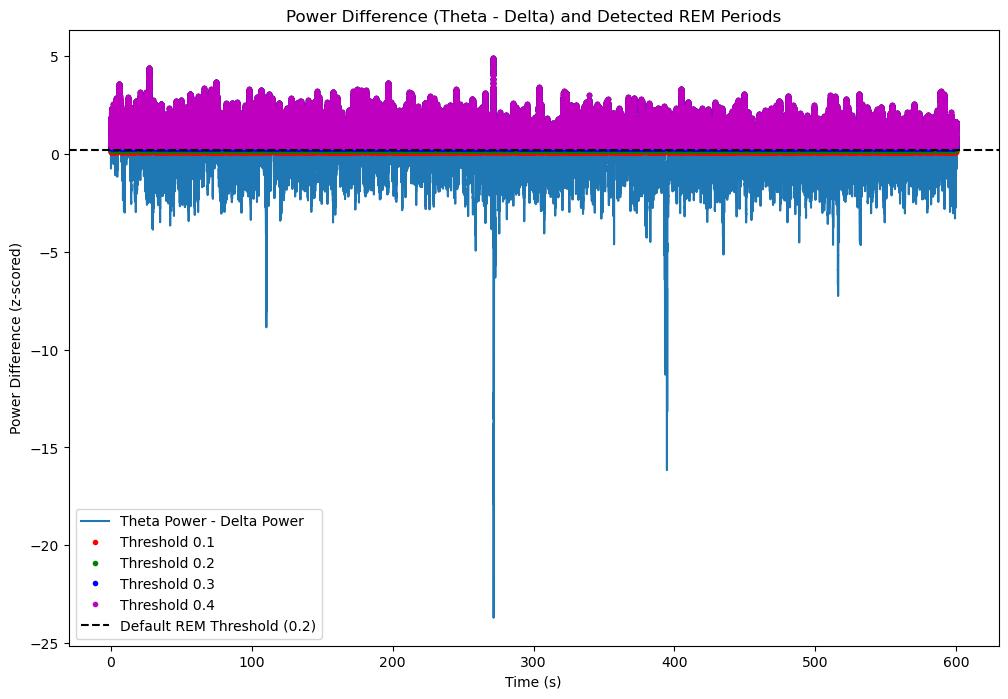

Total REM Duration for Threshold 0.1: 293.21 seconds
Total REM Duration for Threshold 0.2: 272.61 seconds
Total REM Duration for Threshold 0.3: 252.05 seconds
Total REM Duration for Threshold 0.4: 231.58 seconds


In [63]:
# Define thresholds to explore
thresholds = [0.1, 0.2, 0.3, 0.4]

# Function to compute REM periods based on a threshold
def compute_rem_periods(power_difference, threshold):
    return power_difference > threshold

# Compute REM periods for each threshold
rem_periods_dict = {threshold: compute_rem_periods(power_difference, threshold) for threshold in thresholds}

# Compute total duration of REM periods for each threshold
rem_durations = {threshold: np.sum(rem_periods) / sampling_rate for threshold, rem_periods in rem_periods_dict.items()}

# Plot the power difference and REM periods for different thresholds
time = np.arange(len(lfp)) / sampling_rate
plt.figure(figsize=(12, 8))
plt.plot(time, power_difference, label='Theta Power - Delta Power')

colors = ['r', 'g', 'b', 'm']
for i, (threshold, rem_periods) in enumerate(rem_periods_dict.items()):
    plt.plot(time[rem_periods], power_difference[rem_periods], '.', label=f'Threshold {threshold}', color=colors[i])

plt.axhline(y=0.2, color='k', linestyle='--', label='Default REM Threshold (0.2)')
plt.xlabel('Time (s)')
plt.ylabel('Power Difference (z-scored)')
plt.legend()
plt.title('Power Difference (Theta - Delta) and Detected REM Periods')
plt.show()

# Print total duration of REM periods for each threshold
for threshold, duration in rem_durations.items():
    print(f'Total REM Duration for Threshold {threshold}: {duration:.2f} seconds')


-  exploring different thresholds for REM detection demonstrated how the choice of threshold impacts the amount of REM sleep detected, with lower thresholds capturing more REM activity and higher thresholds being more selective.